In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')

train = data[data['year'] != 2021]
test = data[data['year'] == 2021]

#For reproducible results
random_state = 42

In [3]:
# EDA - look at the shape of the dataset
train.shape

(52682, 76)

In [4]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [5]:
# Understand data types
pd.set_option('display.max_rows', None)
train.dtypes

ID_LAT_LON_YEAR_WEEK                                         object
latitude                                                    float64
longitude                                                   float64
year                                                          int64
week_no                                                       int64
SulphurDioxide_SO2_column_number_density                    float64
SulphurDioxide_SO2_column_number_density_amf                float64
SulphurDioxide_SO2_slant_column_number_density              float64
SulphurDioxide_cloud_fraction                               float64
SulphurDioxide_sensor_azimuth_angle                         float64
SulphurDioxide_sensor_zenith_angle                          float64
SulphurDioxide_solar_azimuth_angle                          float64
SulphurDioxide_solar_zenith_angle                           float64
SulphurDioxide_SO2_column_number_density_15km               float64
CarbonMonoxide_CO_column_number_density         

In [6]:
# Understand the target variable
train['emission'].describe()

count    52682.000000
mean        81.623719
std        143.202959
min          0.000000
25%          9.675550
50%         45.348400
75%        109.567170
max       3167.768000
Name: emission, dtype: float64

In [7]:
# check percentage of missing values
100*train.isna().sum()/len(train)

ID_LAT_LON_YEAR_WEEK                                          0.000000
latitude                                                      0.000000
longitude                                                     0.000000
year                                                          0.000000
week_no                                                       0.000000
SulphurDioxide_SO2_column_number_density                     14.912114
SulphurDioxide_SO2_column_number_density_amf                 14.912114
SulphurDioxide_SO2_slant_column_number_density               14.912114
SulphurDioxide_cloud_fraction                                14.912114
SulphurDioxide_sensor_azimuth_angle                          14.912114
SulphurDioxide_sensor_zenith_angle                           14.912114
SulphurDioxide_solar_azimuth_angle                           14.912114
SulphurDioxide_solar_zenith_angle                            14.912114
SulphurDioxide_SO2_column_number_density_15km                14.912114
Carbon

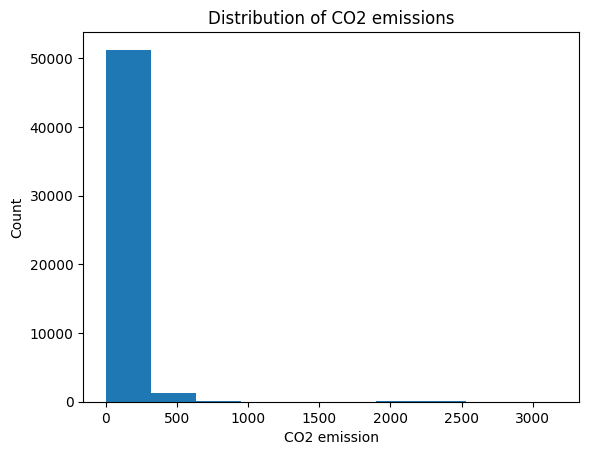

In [8]:
# Visualize the target variable
import matplotlib
from matplotlib import pylab as plt
train['emission'].plot.hist()
plt.xlabel('CO2 emission')
plt.ylabel('Count')
plt.title('Distribution of CO2 emissions')
plt.show()

From the above plot, we can see that the CO2 emission is skewed and follows a long tail distribution

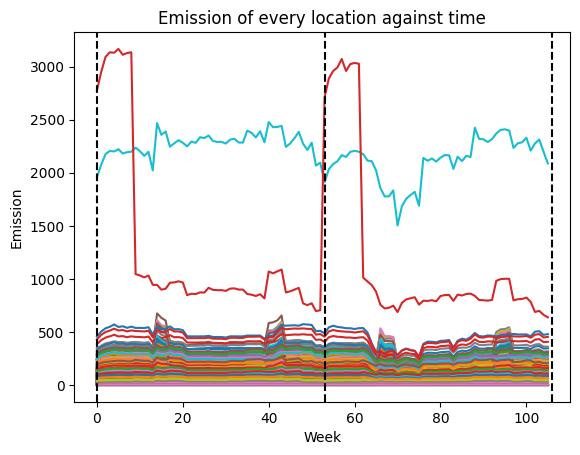

In [9]:
#Seasonality Analysis
for name, group in train.groupby(['latitude', 'longitude']):
    time_series = group['emission']
    plt.plot(range(len(time_series)), time_series)

#year separator
for week in [0, 53, 106]:
    plt.axvline(week, color='k', linestyle='--')

plt.title('Emission of every location against time')
plt.xlabel('Week')
plt.ylabel('Emission')
plt.show()

From the diagram above, we can see that there are two major outliers who have high CO2 emission. For the location labeled in red, we can also see that the emissions are significantly higher during start of the year.

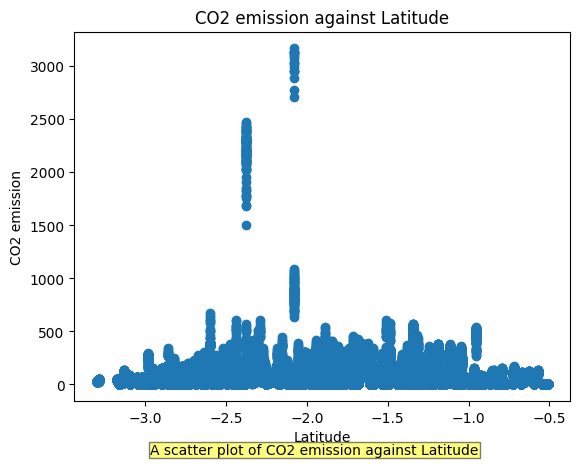

In [10]:
# CO2 against latitude
plt.scatter(train['latitude'], train['emission'])
plt.title('CO2 emission against Latitude')
plt.xlabel('Latitude')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against Latitude", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

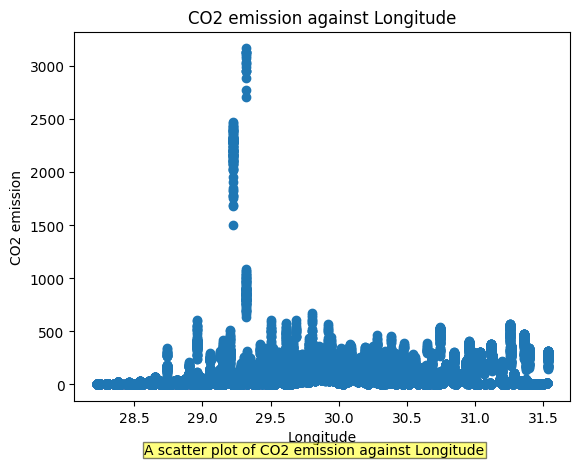

In [11]:
# CO2 against longitude
plt.scatter(train['longitude'], train['emission'])
plt.title('CO2 emission against Longitude')
plt.xlabel('Longitude')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against Longitude", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

/tmp/ipykernel_20/1368257931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns = {'SulphurDioxide_SO2_column_number_density':'SO2_den', 'CarbonMonoxide_CO_column_number_density': 'CO_den', 'NitrogenDioxide_NO2_column_number_density':'NO2_den', 'Formaldehyde_tropospheric_HCHO_column_number_density':'HCHO_den', 'Ozone_O3_column_number_density': 'O3_den'}, inplace = True)


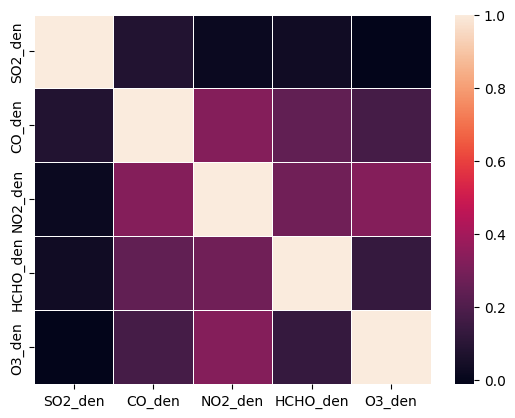

In [12]:
import seaborn as sns

#rename columns for better heatmap display
train.rename(columns = {'SulphurDioxide_SO2_column_number_density':'SO2_den', 'CarbonMonoxide_CO_column_number_density': 'CO_den', 'NitrogenDioxide_NO2_column_number_density':'NO2_den', 'Formaldehyde_tropospheric_HCHO_column_number_density':'HCHO_den', 'Ozone_O3_column_number_density': 'O3_den'}, inplace = True)
density = train[['SO2_den', 'CO_den', 'NO2_den', 'HCHO_den', 'O3_den']].corr()
ax = sns.heatmap(density, linewidth=0.5)

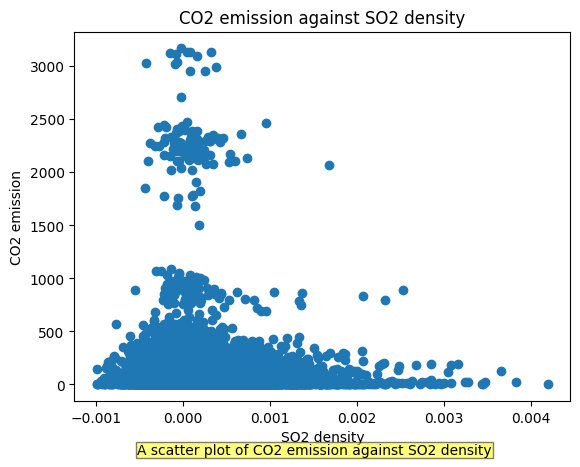

In [13]:
# CO2 against SO2
plt.scatter(train['SO2_den'], train['emission'])
plt.title('CO2 emission against SO2 density')
plt.xlabel('SO2 density')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against SO2 density", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

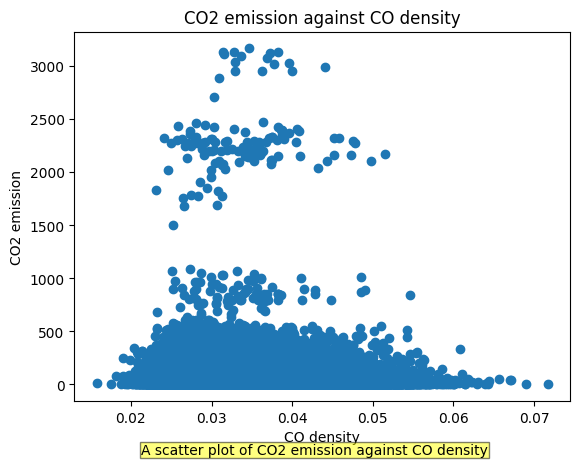

In [14]:
# CO2 against CO
plt.scatter(train['CO_den'], train['emission'])
plt.title('CO2 emission against CO density')
plt.xlabel('CO density')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against CO density", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

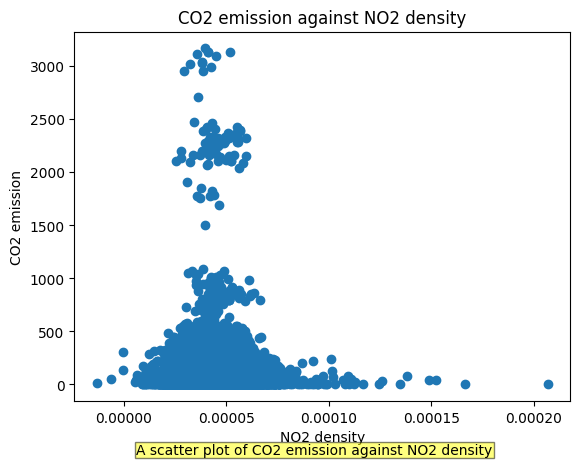

In [15]:
# CO2 against NO2
plt.scatter(train['NO2_den'], train['emission'])
plt.title('CO2 emission against NO2 density')
plt.xlabel('NO2 density')
plt.ylabel('CO2 emission')
#Add caption
plt.figtext(0.5, 0.0001, "A scatter plot of CO2 emission against NO2 density", ha='center', bbox={"facecolor":"yellow", "alpha":0.5, "pad":1})
plt.show()

From the correlation analysis of different gases against CO2, we can see that the data is too noisy, thus the modeling would be focused on predicting the CO2 emissions through time and location

In [16]:
X_train = train[['longitude', 'latitude', 'week_no']]
y_train = train['emission']
X_test = test[['longitude', 'latitude', 'week_no']]
y_test = test['emission']

# split by year due to time series data
groups = train.year

In [17]:
# Cross validation with LeaveOneGroupOut() splitting for time series
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

#Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#Create a scorer using the RMSE function
rmse_scorer = make_scorer(rmse, greater_is_better=False)

def cross_val(model, param_grid, name = ''):
    logo = LeaveOneGroupOut()

    # GridSearch
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=logo.split(X_train, y_train, groups=groups), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    cv_results = grid_search.cv_results_
    best_index = grid_search.best_index_
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Sign reversal
    best_cv_score = -cv_results['mean_test_score'][best_index]
    best_cv_std = cv_results['std_test_score'][best_index]
    print('mean of ' + name + ' best cross-validation score is ' + str(best_cv_score))
    print('standard deviation of ' + name + ' best cross-validation score is ' + str(best_cv_std))
    return best_model, best_params

In [18]:
#Model 1 - RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = random_state, n_jobs = -1)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}
rf_best_model, rf_best_params = cross_val(rf, rf_param_grid, 'Random Forest')
rf_best_params

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


mean of Random Forest best cross-validation score is 28.73870934540304
standard deviation of Random Forest best cross-validation score is 0.380206161891504


{'max_depth': None, 'n_estimators': 200}

In [19]:
#Model 2 - XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = random_state, n_jobs = -1)
xgb_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_best_model, xgb_best_params = cross_val(xgb, xgb_param_grid, 'XGBoost')
xgb_best_params

mean of XGBoost best cross-validation score is 35.161167338392886
standard deviation of XGBoost best cross-validation score is 2.907231943310183


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [20]:
#Model 3 - Elastic Net Regression 
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet_param_grid = {
    'alpha': [0.1, 1.0, 10.0],  
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}
enet_best_model, enet_best_params = cross_val(enet, enet_param_grid, 'Elastic Net Regression')
enet_best_params

mean of Elastic Net Regression best cross-validation score is 142.669337955348
standard deviation of Elastic Net Regression best cross-validation score is 5.800948156897306


{'alpha': 0.1, 'l1_ratio': 0.9}

In [21]:
#Model 4 - KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2] # Distance metric (1 for Manhattan distance, 2 for Euclidean distance)
}
neigh_best_model, neigh_best_params = cross_val(neigh, neigh_param_grid, 'KNeighborsRegressor')
neigh_best_params

mean of KNeighborsRegressor best cross-validation score is 106.47154813113752
standard deviation of KNeighborsRegressor best cross-validation score is 5.074732347510128


{'n_neighbors': 3, 'p': 1}

From the above cross validation scores, we can see that ensemble learning techniques would be more appropriate and accurate for this dataset

In [22]:
# Results
models = [
    ("Elastic Net (Base Model)", enet_best_model), 
    ("KNeighborsRegressor", neigh_best_model),
    ("Random Forest", rf_best_model),
    ("XGBoost", xgb_best_model)
]

models_mean_rmse = []
#models_std_rmse = []

names = []
errors = []
for name, model in models:
    rmse_scores = []
    y_pred = model.predict(X_test)
    #errors = y_test - y_pred
    mean_rmse = mean_squared_error(y_test, y_pred, squared=False)
    #std_rmse = np.std(errors)
    
    names.append(name)
    models_mean_rmse.append(mean_rmse)
    #models_std_rmse.append(std_rmse)

In [23]:
# Baseline Model - Simple Moving Average

window_size = 3

# Calculate Simple Moving Average (SMA)
sma_predictions = []
for i in range(len(y_test) - window_size):
    window = y_test[i:i + window_size]
    sma = np.mean(window)
    sma_predictions.append(sma)
baseline_rmse = mean_squared_error(y_test[:-window_size], sma_predictions, squared=False)
print(baseline_rmse)

26.35461424049772


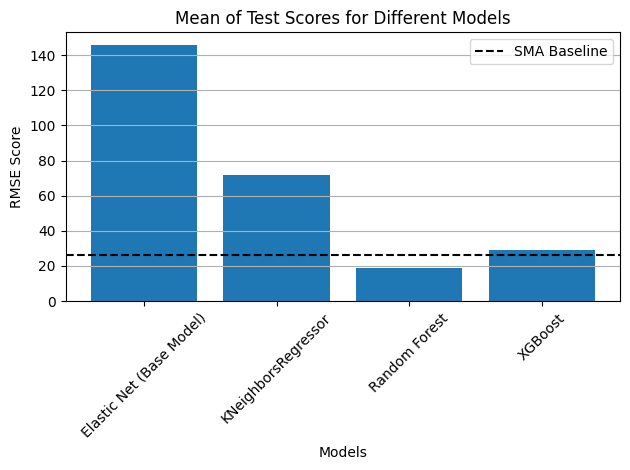

In [24]:
plt.bar(names, models_mean_rmse, capsize=7)
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Mean of Test Scores for Different Models')
plt.xticks(rotation=45)
plt.axhline(baseline_rmse, color='k', linestyle='--', label = "SMA Baseline")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("results")
plt.show()

From the above test results, we can see that Random Forest is the most promising model, thus further model inspection will be conducted

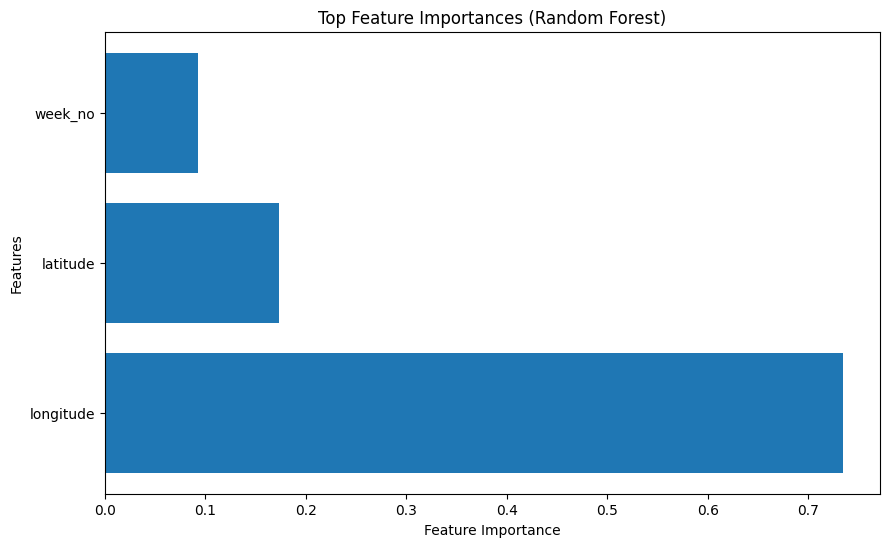

In [25]:
# Model Inspection & Interpretability
feature_importances = rf_best_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances, align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importances (Random Forest)')
          
plt.savefig("feature_importance")
plt.show()

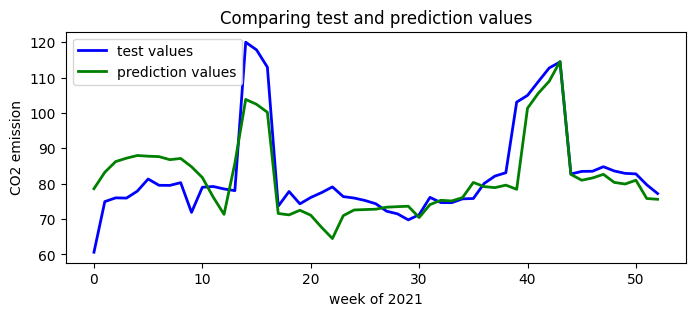

In [26]:
y_pred = pd.Series(rf_best_model.predict(X_test), index=X_test.index)
plt.figure(figsize=(8, 3))
plt.title("Comparing test and prediction values")
plt.xlabel('week of 2021')
plt.ylabel('CO2 emission')
plt.plot(range(53), y_test.groupby(test.week_no).mean(), label='test values', lw=2, color='b')
plt.plot(range(53), y_pred.groupby(test.week_no).mean(), label='prediction values', lw=2, color='g')
plt.legend()
plt.savefig('comparison.png')
plt.show()